In [102]:
import os

subj = "Subj1"
exp = "exp1"
print_obj = 7
os.makedirs(f"{subj}/{exp}", exist_ok = True)

### Imports

In [103]:
%load_ext autoreload
%autoreload 2

import mne
import pandas
import gtda.plotting
import gtda.homology
import gtda.diagrams
import gtda.time_series

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Epochs

Reading d:\HSE\year-3\HSE\CourseProject\Subj1\src\epochs_filt_rr-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
1046 matching events found
No baseline correction applied
0 projection items activated
No projector specified for this dataset. Please consider the method self.add_proj.


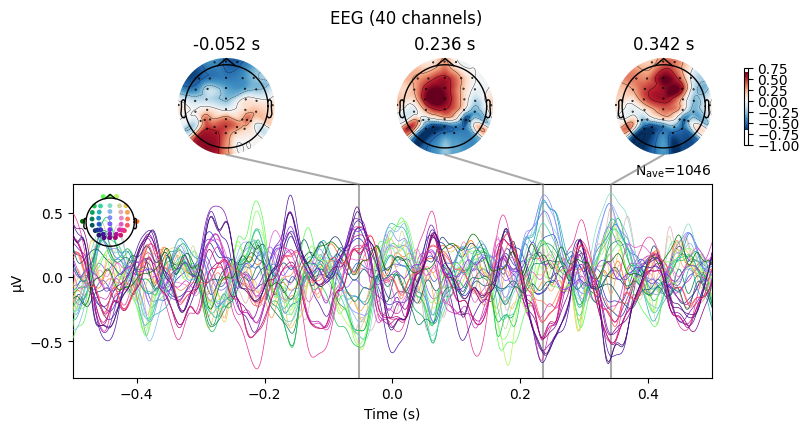

In [104]:
epochs = mne.read_epochs(f"{subj}/src/epochs_filt_rr-epo.fif")
g = epochs.average().plot_joint().savefig(f"{subj}/{exp}/eeg.svg")

### TakensEmbedding

In [105]:
embedder = gtda.time_series.TakensEmbedding(dimension = 10)
points = embedder.fit_transform(epochs.get_data(copy = True))
print(points.shape)

(1046, 492, 400)


In [106]:
plot = gtda.plotting.plot_point_cloud(points[print_obj])
display(plot)
plot.write_image(file = f"{subj}/{exp}/point_cloud.svg", format = "svg")

### VietorisRipsPersistence

In [126]:
persistence = gtda.homology.VietorisRipsPersistence(homology_dimensions = [0, 1, 2], n_jobs = -1)
raw_diagram = persistence.fit_transform(points)
print(raw_diagram.shape)

(1046, 907, 3)


In [127]:
plot = gtda.plotting.plot_diagram(raw_diagram[8])
display(plot)
plot.write_image(file = f"{subj}/{exp}/raw_diagram.svg", format = "svg")

### Scaler & Filtering

In [128]:
scaler = gtda.diagrams.Scaler()
filtering = gtda.diagrams.Filtering()
diagram = filtering.fit_transform(scaler.fit_transform(raw_diagram))
print(diagram.shape)

(1046, 771, 3)


In [129]:
plot = gtda.plotting.plot_diagram(diagram[print_obj])
display(plot)
plot.write_image(file = f"{subj}/{exp}/diagram.svg", format = "svg")

### PersistenceEntropy

In [130]:
entropy = gtda.diagrams.PersistenceEntropy()
features = entropy.fit_transform(diagram)
print(features.shape)
print(features[print_obj])

(1046, 3)
[8.88538293 6.67679166 4.76249191]


### Save

In [131]:
df = pandas.DataFrame(features)
df.to_feather(f"{subj}/{exp}/features.feather")
df

,0,1,2
0,8.911387,5.794139,5.653280
1,8.885214,5.741187,5.223418
2,8.911129,6.040048,5.362892
3,8.900512,5.226204,4.284227
4,8.904863,6.016462,5.350425
...,...,...,...
1041,8.893091,4.107055,2.577471
1042,8.898533,3.359531,2.423112
1043,8.898618,4.166171,2.568725
1044,8.909021,3.837490,2.061480
